<a href="https://colab.research.google.com/github/magladko/PSM/blob/main/projekt_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Projekt 3 @s22411
---
Rozwiąż analitycznie oraz numerycznie metodami MidPoint oraz Runge-Kutta
równanie różniczkowe:<br>

<img src="https://latex.codecogs.com/gif.image?\inline&space;\LARGE&space;\dpi{110}\bg{white}(1&plus;x^{2})xy\frac{dy}{dx}=1&plus;y^{2}" title="https://latex.codecogs.com/gif.image?\inline \LARGE \dpi{110}\bg{white}(1+x^{2})xy\frac{dy}{dx}=1+y^{2}" />


Dla wartości początkowej <img src="https://latex.codecogs.com/gif.image?\inline&space;\LARGE&space;\dpi{110}\bg{white}y(1)&space;=&space;1" title="https://latex.codecogs.com/gif.image?\inline \LARGE \dpi{110}\bg{white}y(1) = 1" />

##Rozwiązanie analityczne
---


1. <img src="https://latex.codecogs.com/gif.image?\inline&space;\LARGE&space;\dpi{110}\bg{white}(1&plus;x^{2})xy\frac{dy}{dx}=1&plus;y^{2}" title="https://latex.codecogs.com/gif.image?\inline \LARGE \dpi{110}\bg{white}(1+x^{2})xy\frac{dy}{dx}=1+y^{2}" />

2. <img src="https://latex.codecogs.com/gif.image?\inline&space;\LARGE&space;\dpi{110}\bg{white}\frac{y}{1&plus;y^{2}}dy=\frac{dx}{x^{3}&plus;x}" title="https://latex.codecogs.com/gif.image?\inline \LARGE \dpi{110}\bg{white}\frac{y}{1+y^{2}}dy=\frac{dx}{x^{3}+x}" />

3. <img src="https://latex.codecogs.com/gif.image?\inline&space;\LARGE&space;\dpi{110}\bg{white}\int&space;\frac{y}{1&plus;y^{2}}dy=\int&space;\frac{dx}{x^{3}&plus;x}" title="https://latex.codecogs.com/gif.image?\inline \LARGE \dpi{110}\bg{white}\int \frac{y}{1+y^{2}}dy=\int \frac{dx}{x^{3}+x}" />
4. <img src="https://latex.codecogs.com/gif.image?\inline&space;\LARGE&space;\dpi{110}\bg{white}\frac{1}{2}ln(\frac{1}{1&plus;y^{2}})&space;=&space;ln(x)-\frac{1}{2}ln(x^{2}&plus;1)&plus;C" title="https://latex.codecogs.com/gif.image?\inline \LARGE \dpi{110}\bg{white}\frac{1}{2}ln(\frac{1}{1+y^{2}}) = ln(x)-\frac{1}{2}ln(x^{2}+1)+C" />
5. <img src="https://latex.codecogs.com/gif.image?\dpi{110}\bg{white}y=\pm\frac{\sqrt{cx^{2}-x^{2}-1}}{\sqrt{x^{2}&plus;1}}" title="https://latex.codecogs.com/gif.image?\dpi{110}\bg{white}y=\pm\frac{\sqrt{cx^{2}-x^{2}-1}}{\sqrt{x^{2}+1}}" />

6. dla y(1)=1 => C=4 oraz:
7. <img src="https://latex.codecogs.com/gif.image?\dpi{110}\bg{white}y=\frac{\sqrt{3x^{2}-1}}{\sqrt{x^{2}&plus;1}" title="https://latex.codecogs.com/gif.image?\dpi{110}\bg{white}y=\frac{\sqrt{3x^{2}-1}}{\sqrt{x^{2}+1}" />


#Rozwiązanie numeryczne
---
<img src="https://latex.codecogs.com/gif.image?\huge&space;\dpi{110}\bg{white}f(y,x)=\frac{dy}{dx}=\frac{y^2&plus;1}{(x^2&plus;1)xy}" title="https://latex.codecogs.com/gif.image?\huge \dpi{110}\bg{white}f(y,x)=\frac{dy}{dx}=\frac{y^2+1}{(x^2+1)xy}" /><br>

<img src="https://latex.codecogs.com/gif.image?\huge&space;\dpi{110}\bg{white}dy=\frac{y^{2}&plus;1}{(x^{2}&plus;1)xy}dx" title="https://latex.codecogs.com/gif.image?\huge \dpi{110}\bg{white}dy=\frac{y^{2}+1}{(x^{2}+1)xy}dx" />

###Imports

In [95]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

###Set dx and approximation range

In [96]:
#@title Set step { run: "auto" }
dx = 0.33 #@param {type:"slider", min:0.01, max:0.5, step:0.01}
approx_range = 16 #@param {type:"slider", min:2, max:50, step:1}

# Starting point
x0 = 1
y0 = 1


###Exact function and derivative approximation

Exact function:
<img src="https://latex.codecogs.com/gif.image?\dpi{110}\bg{white}y=\frac{\sqrt{3x^{2}-1}}{\sqrt{x^{2}&plus;1}" title="https://latex.codecogs.com/gif.image?\dpi{110}\bg{white}y=\frac{\sqrt{3x^{2}-1}}{\sqrt{x^{2}+1}" />

Derivative function:
<img src="https://latex.codecogs.com/gif.image?\dpi{100}\bg{white}f(y,&space;x)=\frac{dx}{dy}=\frac{y^{2}&plus;1}{(x^{2}&plus;1)xy}" title="https://latex.codecogs.com/gif.image?\dpi{100}\bg{white}f(y, x)=\frac{dx}{dy}=\frac{y^{2}+1}{(x^{2}+1)xy}" />

In [97]:
def exact_function(x):
    return np.sqrt(3*np.power(x, 2)-1)/np.sqrt(np.power(x, 2)+1)

# derivative approximation
def approximate_dx_dy(y, x):
    return ((np.power(y,2)+1)/((np.power(x,2)+1)*x*y))


##Metoda Midpoint
---
> <img src="https://latex.codecogs.com/gif.image?\large&space;\dpi{100}\bg{white}midpoint(y_{n},x_{n},dx):" title="https://latex.codecogs.com/gif.image?\large \dpi{100}\bg{white}midpoint(y_{n},x_{n},dx):" /><br>
1. <img src="https://latex.codecogs.com/gif.image?\large&space;\dpi{100}\bg{white}h=dx" title="https://latex.codecogs.com/gif.image?\large \dpi{100}\bg{white}h=dx" />
2. <img src="https://latex.codecogs.com/gif.image?\large&space;\dpi{100}\bg{white}k_{1}=f(y_{n},x_{n},h)" title="https://latex.codecogs.com/gif.image?\large \dpi{100}\bg{white}k_{1}=f(y_{n},x_{n},h)" />
3. <img src="https://latex.codecogs.com/gif.image?\large&space;\dpi{100}\bg{white}k_{2}=f(y_{n}&plus;\frac{h}{2}k_{1},x_{n}&plus;\frac{h}{2},h)" title="https://latex.codecogs.com/gif.image?\large \dpi{100}\bg{white}k_{2}=f(y_{n}+\frac{h}{2}k_{1},x_{n}+\frac{h}{2},h)" />
4. return:<br> <img src="https://latex.codecogs.com/gif.image?\large&space;\dpi{100}\bg{white}y_{n&plus;1}=y_{n}&plus;h*k_{2}" title="https://latex.codecogs.com/gif.image?\large \dpi{100}\bg{white}y_{n+1}=y_{n}+h*k_{2}" />


In [98]:
def midpoint(y, x, dx):
    h = dx
    k1 = approximate_dx_dy(y, x)
    k2 = approximate_dx_dy(y + h/2 * k1, x + h/2)
    return y + h*k2


###Value calculation

In [99]:
X = [x for x in np.arange(x0, approx_range, dx)] # list of x values
Y = [y0]                                         # list of approximated y values
Y_exact = [y0]                                   # list of exact y values
yerr = [0]                                       # list of errors

# calculate Y and error values
for i, x in enumerate(X[1:]):
    Y.append(midpoint(Y[i], x, dx))
    Y_exact.append(exact_function(x))
    yerr.append(Y_exact[i] - Y[i])


###Midpoint function plotting

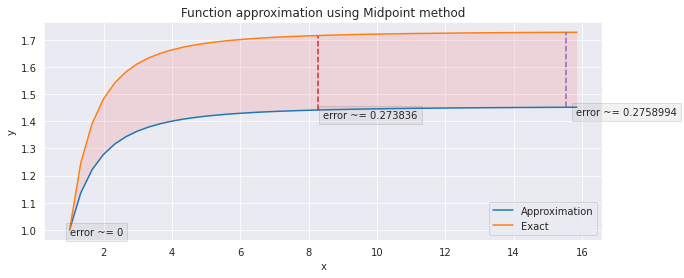

In [100]:
sns.set_style("darkgrid")

fig, ax = plt.subplots()
fig.set_size_inches(10, 4, True)
ax.set_title("Function approximation using Midpoint method")

ax.plot(X, Y, label='Approximation')
ax.plot(X, Y_exact, label='Exact')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend()

ax.fill_between(X, Y, Y_exact, facecolor='red', alpha=0.1)

for i in range(0, len(X), (len(X))//2-1):
    t = ax.text(1.02*X[i], 0.98*Y[i], "error ~= {}".format(np.round(yerr[i],7)))
    t.set_bbox(dict(facecolor='gray', alpha=0.1, edgecolor='black'))
    ax.plot([X[i], X[i]], [Y[i], Y_exact[i]], "--")

plt.show()

##Metoda Rungego-Kutty
---

> <img src="https://latex.codecogs.com/gif.image?\large&space;\dpi{100}\bg{white}runge\_kutta(y_{n},x_{n},dx):" title="https://latex.codecogs.com/gif.image?\large \dpi{100}\bg{white}runge\_kutta(y_{n},x_{n},dx):" /><br>
1. <img src="https://latex.codecogs.com/gif.image?\large&space;\dpi{100}\bg{white}h=dx" title="https://latex.codecogs.com/gif.image?\large \dpi{100}\bg{white}h=dx" />
2. <img src="https://latex.codecogs.com/gif.image?\large&space;\dpi{100}\bg{white}k_{1}=f(y_{n},x_{n})" title="https://latex.codecogs.com/gif.image?\large \dpi{100}\bg{white}k_{1}=f(y_{n},x_{n})" />
3. <img src="https://latex.codecogs.com/gif.image?\large&space;\dpi{100}\bg{white}k_{2}=f(y_{n}&plus;\frac{h}{2}k_{1},x_{n}&plus;\frac{h}{2})" title="https://latex.codecogs.com/gif.image?\large \dpi{100}\bg{white}k_{2}=f(y_{n}+\frac{h}{2}k_{1},x_{n}+\frac{h}{2})" />
4. <img src="https://latex.codecogs.com/gif.image?\large&space;\dpi{100}\bg{white}k_{3}=f(y_{n}&plus;\frac{h}{2}k_{2},x_{n}&plus;\frac{h}{2})" title="https://latex.codecogs.com/gif.image?\large \dpi{100}\bg{white}k_{3}=f(y_{n}+\frac{h}{2}k_{2},x_{n}+\frac{h}{2})" />
5. <img src="https://latex.codecogs.com/gif.image?\large&space;\dpi{100}\bg{white}k_{4}=f(y_{n}&plus;hk_{3},x_{n}&plus;h)" title="https://latex.codecogs.com/gif.image?\large \dpi{100}\bg{white}k_{4}=f(y_{n}+hk_{3},x_{n}+h)" />
6. return:<br> <img src="https://latex.codecogs.com/gif.image?\large&space;\dpi{100}\bg{white}y_{n&plus;1}=y_{n}&plus;\frac{h}{6}(k_{1}&plus;2k_{2}&plus;2k_{3}&plus;k_{4})" title="https://latex.codecogs.com/gif.image?\large \dpi{100}\bg{white}y_{n+1}=y_{n}+\frac{h}{6}(k_{1}+2k_{2}+2k_{3}+k_{4})" />





In [101]:
def runge_kutta(y, x, dx):
    h = dx
    k1 = approximate_dx_dy(y, x)
    k2 = approximate_dx_dy(y + h/2 * k1, x + h/2)
    k3 = approximate_dx_dy(y + h/2 * k2, x + h/2)
    k4 = approximate_dx_dy(y + h*k3, x + h)
    return y + h * (k1 + 2*k2 + 2*k3 + k4) / 6


###Value calculation

In [102]:
X = [x for x in np.arange(x0, approx_range, dx)] # list of x values
Y = [y0]                                         # list of approximated y values
Y_exact = [y0]                                   # list of exact y values
yerr = [0]                                       # list of errors

# calculate Y and error values
for i, x in enumerate(X[1:]):
    Y.append(runge_kutta(Y[i], x, dx))
    Y_exact.append(exact_function(x))
    yerr.append(Y_exact[i] - Y[i])


###Runge-Kutta function plotting

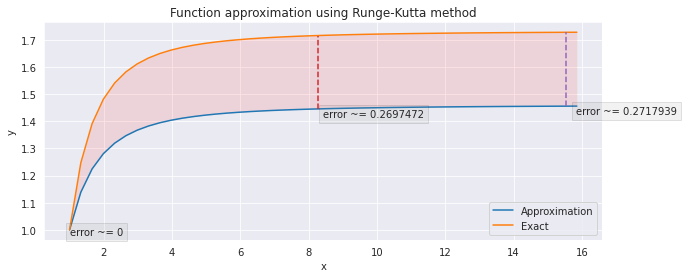

In [103]:
sns.set_style("darkgrid")

fig, ax = plt.subplots()
fig.set_size_inches(10, 4, True)
ax.set_title("Function approximation using Runge-Kutta method")

ax.plot(X, Y, label='Approximation')
ax.plot(X, Y_exact, label='Exact')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend()

ax.fill_between(X, Y, Y_exact, facecolor='red', alpha=0.1)

for i in range(0, len(X), (len(X))//2-1):
    t = ax.text(1.02*X[i], 0.98*Y[i], "error ~= {}".format(np.round(yerr[i],7)))
    t.set_bbox(dict(facecolor='gray', alpha=0.1, edgecolor='black'))
    ax.plot([X[i], X[i]], [Y[i], Y_exact[i]], "--")

plt.show()